In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
# Open the dataset 
train = pd.read_csv("../input/titanic/train.csv", index_col=0)
test = pd.read_csv("../input/titanic/test.csv", index_col=0)

# Show first lines
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Data

In [4]:
# Dimensions 
print(f"Dimension :\n\t{train.shape[0]} ligne\n\t{train.shape[1]} colonnes")

# Show Features
print(f"\nFeatures :\n{train.columns.values}")

# Count the number of missing values in each column
print(f"\n\nMissing vlues : \n{train.isna().sum()}")

# Count the number of different values in each column 
print("\n\nUniques values : ")
for column in train.columns:
    print(f"{column} : {len(train[column].unique())} ")
    
# Know the types of columns
print("\n\nType of columns :\n",train.dtypes)

Dimension :
	891 ligne
	11 colonnes

Features :
['Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


Missing vlues : 
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


Uniques values : 
Survived : 2 
Pclass : 3 
Name : 891 
Sex : 2 
Age : 89 
SibSp : 7 
Parch : 7 
Ticket : 681 
Fare : 248 
Cabin : 148 
Embarked : 4 


Type of columns :
 Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object


## 2. Exploratory Data Analysis

* ### variable Survivel

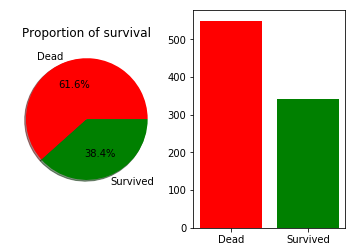

In [5]:
# Proportion of survival
labels = ["Dead", "Survived"]
sizes = train['Survived'].value_counts().values
colors = ["r", "g"]

plt.subplot(1,2,1)
plt.title("Proportion of survival")
plt.pie(sizes, labels=labels, colors=colors, shadow=True, autopct='%1.1f%%')

plt.subplot(1,2,2)
plt.bar(labels, sizes, color=colors)
plt.show()

* ### Pclass

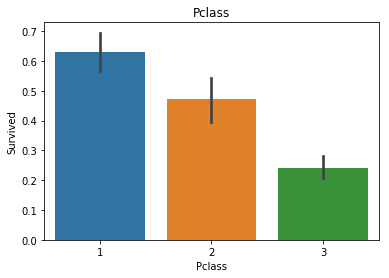

In [6]:
plt.title("Pclass")
sns.barplot(y='Survived',x='Pclass',data=train)
plt.show()

* ### Sex

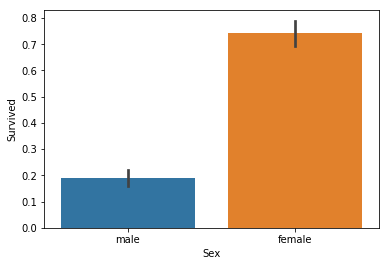

In [7]:
plot = sns.barplot(y='Survived',x='Sex',data=train)

* ### Age

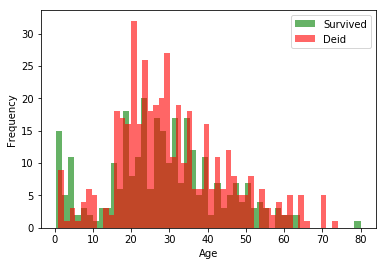

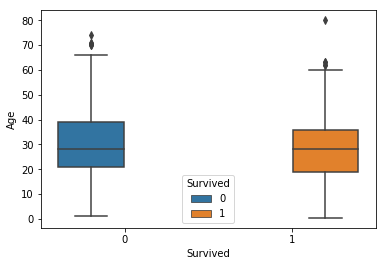

In [8]:
survived = train[train.Survived == 1]
died = train[train.Survived == 0]

ax = survived.Age.plot.hist(histtype="stepfilled", bins=50, alpha=0.6, color="g", label="Survived")
ax = died.Age.plot.hist(histtype="stepfilled", bins=50, alpha=0.6, color="r", label="Deid")
plt.xlabel("Age")
plt.legend()
plt.show()
ax = sns.boxplot(x="Survived", y="Age", hue="Survived", data=train)

* ### SibSp

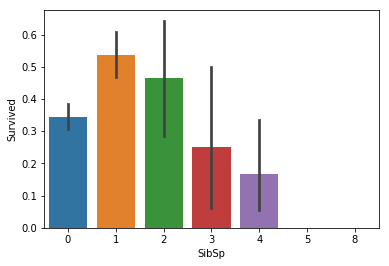

In [9]:
ax = sns.barplot(y='Survived',x='SibSp',data=train)

* ### Parch

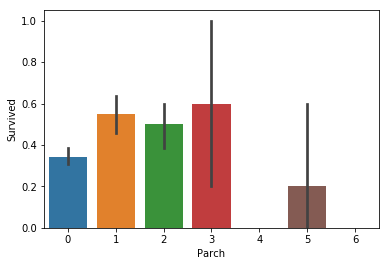

In [10]:
ax = sns.barplot(y='Survived',x='Parch',data=train)

* ## Fare

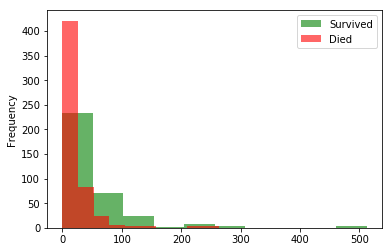

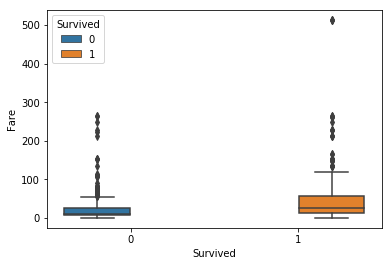

In [11]:
ax = survived.Fare.plot.hist(histtype="stepfilled", alpha=0.6, color="g", label="Survived")
ax = died.Fare.plot.hist(histtype="stepfilled", alpha=0.6, color="r", label="Died")
plt.legend()
plt.show()

ax = sns.boxplot(x="Survived", y="Fare", hue="Survived", data=train)

* ### Embarked

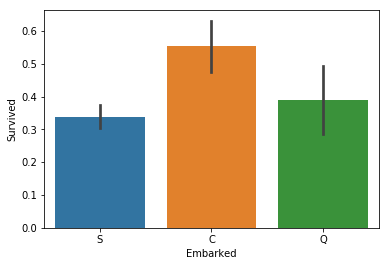

In [12]:
ax = sns.barplot(y='Survived',x='Embarked',data=train)

## 2.2 Correlation matrix 

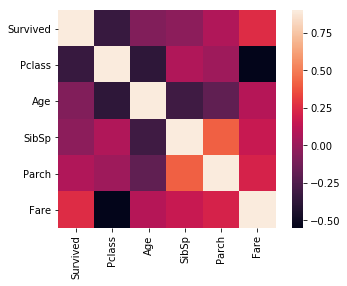

In [13]:
corrmat = train.corr()
plot = sns.heatmap(corrmat, vmax=.9, square=True)

In [14]:
# Deleting Missing Values of column "Embarked"
train.dropna(subset=["Embarked"], axis=0, inplace=True)

# removal of the column "Cabin" 
train.drop('Cabin', axis=1, inplace=True)

# removal of the column "Name"  
train.drop("Name", axis=1, inplace=True)

# Unique Values
print("\n\nUnique Values :")
for column in train.columns:
    print(f"{column} : {len(train[column].unique())} ")
    
    
# Type of columns
print(f"\n\nType of columns:\n{train.dtypes}")



Unique Values :
Survived : 2 
Pclass : 3 
Sex : 2 
Age : 89 
SibSp : 7 
Parch : 7 
Ticket : 680 
Fare : 247 
Embarked : 3 


Type of columns:
Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object


In [15]:
# Splitting data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.drop("Survived", axis=1),
                                                    train.Survived, 
                                                    test_size=0.2)

print(f"Train set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Train set: (711, 8)
Test set: (178, 8)


In [16]:
# Encoding categorical values
from sklearn.preprocessing import OneHotEncoder

# columns "Sex"
sex_encoder = OneHotEncoder()

sex_tf_set = pd.DataFrame(sex_encoder.fit_transform(X_train[["Sex"]]).toarray(),
                          columns=["F", "H"], index=X_train.index)

X_train = pd.concat([X_train.drop("Sex", axis=1), sex_tf_set], axis=1)


# columns "Embarked"
embarked_encoder = OneHotEncoder()

embarked_tf_set = pd.DataFrame(embarked_encoder.fit_transform(X_train[["Embarked"]]).toarray(),
                               columns=["C", "S", "Q"], index=X_train.index)
X_train = pd.concat([X_train.drop("Embarked", axis=1), embarked_tf_set], axis=1)


# columns "Ticket"
ticket_encoder = OneHotEncoder(handle_unknown='ignore')

ticket_tf_set = pd.DataFrame(ticket_encoder.fit_transform(X_train[["Ticket"]]).toarray(),
                             columns=[f"Ticket_{i}" for i in range(len(X_train.Ticket.unique()))],
                             index=X_train.index)
X_train = pd.concat([X_train.drop("Ticket", axis=1), ticket_tf_set], axis=1)

print("Dimensions: ", X_train.shape)



# Imputation 

# Variable Age
from sklearn.impute import SimpleImputer

age_impute = SimpleImputer(missing_values=np.nan, strategy="mean")
X_train["Age"] = age_impute.fit_transform(X_train[["Age"]], y_train)


# Variable Fare
fare_impute = SimpleImputer(missing_values=np.nan, strategy="mean").fit(X_train[["Fare"]], y_train)

# Count the number of missing values in each column
print(f"\n\nMissing vlues: {X_train.isna().sum().sum()}")

# Normalization of columns "Age" and "Fare"
from sklearn.preprocessing import RobustScaler

age_fare_scaler = RobustScaler()

age_fae_tf_set = pd.DataFrame(age_fare_scaler.fit_transform(X_train[["Age", "Fare"]]),
                              columns=["Age", "Fare"], index=X_train.index)

X_train = pd.concat([X_train.drop(["Age", "Fare"], axis=1), age_fae_tf_set], axis=1)

Dimensions:  (711, 573)


Missing vlues: 0


In [17]:
def preprocessing_new_data(X, inplace=False):

    if not inplace:
        X = X.copy()
        
    if "Cabin" in X:
        X.drop('Cabin', axis=1, inplace=True)

    if "Name" in X:
        X.drop('Name', axis=1, inplace=True)

    # columns "Sex"
    sex_tf_set = pd.DataFrame(sex_encoder.transform(X[["Sex"]]).toarray(),
                          columns=["F", "H"], index=X.index)
    X = pd.concat([X.drop("Sex", axis=1), sex_tf_set], axis=1)
    
    
    # columns "Embarked"
    embarked_tf_set = pd.DataFrame(embarked_encoder.transform(X[["Embarked"]]).toarray(),
                               columns=["C", "S", "Q"], index=X.index)
    X = pd.concat([X.drop("Embarked", axis=1), embarked_tf_set], axis=1)


    # columns "Ticket"
    ticket_tf = ticket_encoder.transform(X[["Ticket"]]).toarray()
    ticket_tf_set = pd.DataFrame(ticket_tf, 
                                 columns=[f"Ticket_{i}" for i in range(ticket_tf.shape[1])],
                                 index=X.index)
    
    X = pd.concat([X.drop("Ticket", axis=1), ticket_tf_set], axis=1)

    # Imputation 
    # colums "Age"
    X["Age"] = age_impute.transform(X[["Age"]])
    
    # column "Fare"
    X["Fare"] = fare_impute.transform(X[["Fare"]])
    
    # Normalization 
    age_fae_tf_set = pd.DataFrame(age_fare_scaler.transform(X[["Age", "Fare"]]),
                              columns=["Age", "Fare"], index=X.index)

    X = pd.concat([X.drop(["Age", "Fare"], axis=1), age_fae_tf_set], axis=1)
    return X

In [18]:
X_test = preprocessing_new_data(X_test)

## 3. Model Building

### 3.1 Logistic Regression

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(solver='newton-cg')

logreg_model.fit(X_train, y_train)

print(f"Logistic Regression Score: {logreg_model.score(X_test, y_test)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, logreg_model.predict(X_test)))

Logistic Regression Score: 0.8033707865168539
Confusion Matrix:
[[101  13]
 [ 22  42]]


### 3.2 Random Forest

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Estimation of the hyperparameters of the Random Forest model
param_grid = {
    'n_estimators': [100, 300, 500, 800, 1200], 
    'max_depth': [5, 8, 15, 25, 30],
    'min_samples_split': [2, 5, 10, 15, 30], 
    'min_samples_leaf': [1, 2, 5, 10] 

}
# run grid search
grid_search_randfor = GridSearchCV(RandomForestClassifier(n_jobs = -1), param_grid=param_grid, cv=5)

grid_search_randfor.fit(X_train, y_train)

print(f"RandomForest Score: {grid_search_randfor.best_score_}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, grid_search_randfor.best_estimator_.predict(X_test)))

RandomForest Score: 0.8270042194092827
Confusion Matrix:
[[106   8]
 [ 22  42]]


In [21]:
rf_model = RandomForestClassifier(max_depth=25, 
                                  min_samples_leaf=1,
                                  min_samples_split=2,
                                  n_estimators=300)

rf_model.fit(X_train, y_train)

rf_model.score(X_test, y_test)

0.8370786516853933

### 3.3 SVM

In [22]:
from sklearn.svm import SVC

svm_model = SVC(C=10, kernel='linear')

svm_model.fit(X_train, y_train)

svm_model.score(X_test, y_test)

0.7921348314606742

In [23]:

test = preprocessing_new_data(test)

submission = pd.DataFrame({
    "Survived": rf_model.predict(test),
    "PassengerId": test.index
})

submission.to_csv("submission.csv", index=False)
